<a href="https://colab.research.google.com/github/mke27/ECON3916-Statistical-Machine-Learning/blob/main/Lab_2_Deflating_History_with_FRED.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install fredapi

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
from fredapi import Fred
import seaborn as sns

# Authenticate
# Replace the string below with YOUR unique API key from fred.stlouisfed.org
fred = Fred(api_key='')

In [4]:
# 1. Fetch the data series
print("Fetching data from FRED...")
wages = fred.get_series('AHETPI')
cpi = fred.get_series('CPIAUCSL')

# 2. Combine into a DataFrame
df = pd.DataFrame({'Nominal_Wage': wages, 'CPI': cpi})

# 3. Drop missing values (The wage data starts later than CPI data)
df = df.dropna()

# Inspect the raw data
print(df.head())
print(df.tail())

Fetching data from FRED...
            Nominal_Wage    CPI
1964-01-01          2.50  30.94
1964-02-01          2.50  30.91
1964-03-01          2.51  30.94
1964-04-01          2.52  30.95
1964-05-01          2.52  30.98
            Nominal_Wage      CPI
2025-06-01         31.26  321.500
2025-07-01         31.35  322.132
2025-08-01         31.45  323.364
2025-09-01         31.52  324.368
2025-11-01         31.73  325.031


In [5]:
def get_real_wage(nominal_col, cpi_col):
    """
    Takes a nominal column and a CPI column.
    Returns a new column adjusted for inflation (Real Dollars).
    """
    # 1. Get the CPI of the most recent date (Today's Prices)
    # .iloc[-1] grabs the very last row in the data
    cpi_today = cpi_col.iloc[-1]

    # 2. The Formula: (Nominal / Old_CPI) * CPI_Today
    real_col = (nominal_col / cpi_col) * cpi_today

    return real_col

# Apply the function to create a new column
# We feed the "Machine" our two columns:
df['Real_Wage'] = get_real_wage(df['Nominal_Wage'], df['CPI'])

# Check the result - Notice how Real Wages are different from Nominal!
print(df.tail())

            Nominal_Wage      CPI  Real_Wage
2025-06-01         31.26  321.500  31.603325
2025-07-01         31.35  322.132  31.632132
2025-08-01         31.45  323.364  31.612130
2025-09-01         31.52  324.368  31.584426
2025-11-01         31.73  325.031  31.730000


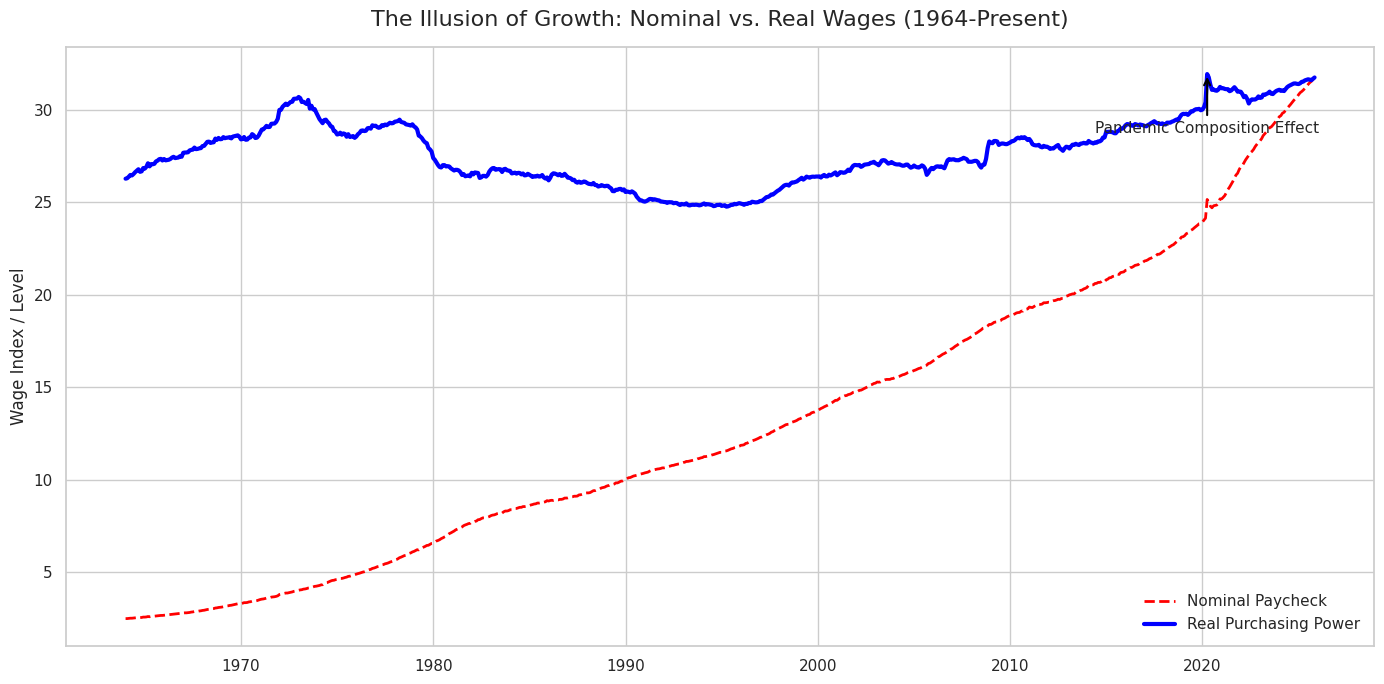

In [7]:
# Style and figure setup
sns.set_theme(style="whitegrid")
fig, ax = plt.subplots(figsize=(14, 7))

# Plot the time series
ax.plot(
    df.index,
    df["Nominal_Wage"],
    linestyle="--",
    color="red",
    linewidth=2,
    label="Nominal Paycheck",
)

ax.plot(
    df.index,
    df["Real_Wage"],
    color="blue",
    linewidth=3,
    label="Real Purchasing Power",
)

# Title and legend
ax.set_title(
    "The Illusion of Growth: Nominal vs. Real Wages (1964-Present)",
    fontsize=16,
    pad=15,
)
ax.legend(frameon=False)

# --- Annotation for the 2020 spike in Real Wages ---
# Find the peak in Real_Wage during 2020
real_2020 = df.loc["2020", "Real_Wage"]
peak_date = real_2020.idxmax()
peak_value = real_2020.max()

ax.annotate(
    "Pandemic Composition Effect",
    xy=(peak_date, peak_value),
    xytext=(peak_date, peak_value * 0.9),
    arrowprops=dict(arrowstyle="->", color="black", lw=1.5),
    fontsize=11,
    ha="center",
)

# Clean up axes
ax.set_xlabel("")
ax.set_ylabel("Wage Index / Level")

plt.tight_layout()
plt.show()

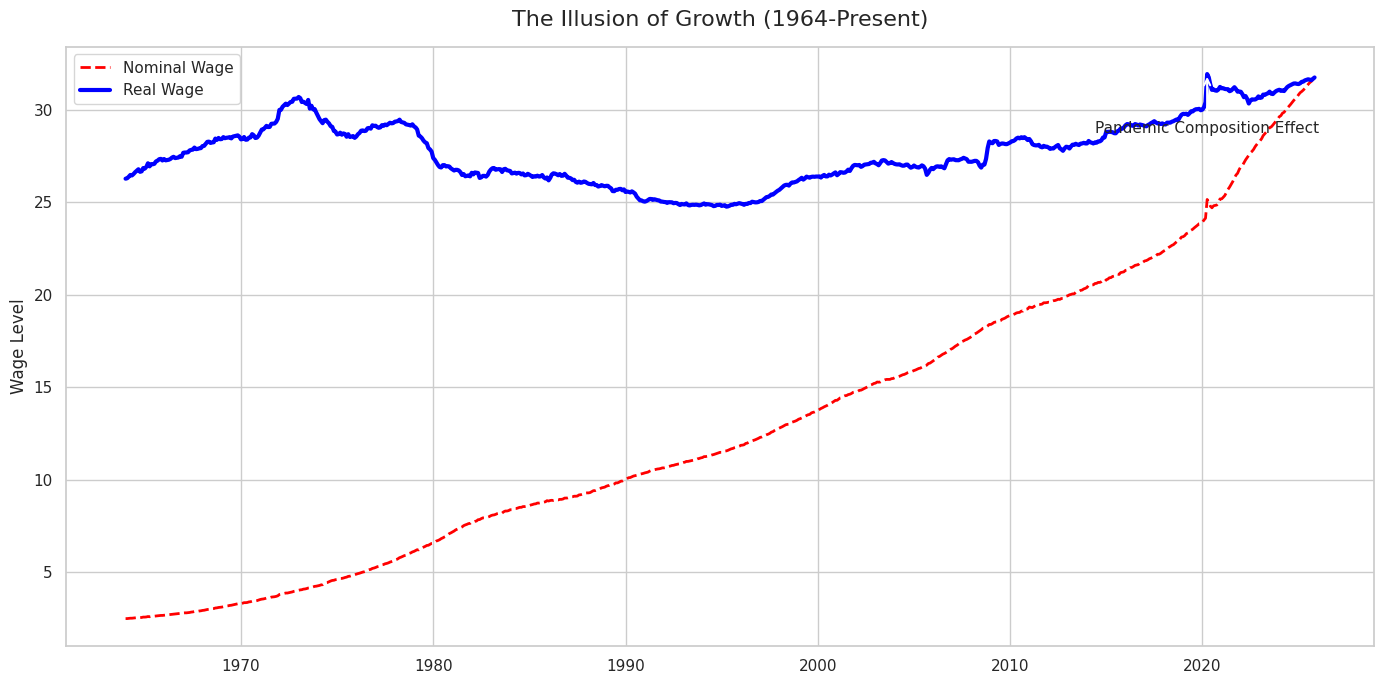

In [8]:
# Create figure
fig, ax = plt.subplots(figsize=(14, 7))

# Plot lines
ax.plot(
    df.index,
    df["Nominal_Wage"],
    linestyle="--",
    color="red",
    linewidth=2,
    label="Nominal Wage",
)

ax.plot(
    df.index,
    df["Real_Wage"],
    linestyle="-",
    color="blue",
    linewidth=3,
    label="Real Wage",
)

# Title and legend
ax.set_title("The Illusion of Growth (1964-Present)", fontsize=16, pad=15)
ax.legend()

# Annotate the 2020 spike in Real Wage
real_2020 = df.loc["2020", "Real_Wage"]
spike_date = real_2020.idxmax()
spike_value = real_2020.max()

ax.annotate(
    "Pandemic Composition Effect",
    xy=(spike_date, spike_value),
    xytext=(spike_date, spike_value * 0.9),
    arrowprops=dict(arrowstyle="->", linewidth=1.5),
    fontsize=11,
    ha="center",
)

# Clean up axes
ax.set_xlabel("")
ax.set_ylabel("Wage Level")

plt.tight_layout()
plt.show()